# EDA Titanic

### Content
#### 1. Load data
#### 2. Data exploration
#### 2.1 EDA: Target Variable Study
#### 3. Processing the data
#### 3.1 Creating new variables for poeple who travel alone
#### 4. Model
#### 5. Testing
#### 5.1 Test Set Assessment
#### 6. Conclusion

### 1. Load data

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# Read data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [135]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data exploration

In [136]:
# What is the size of the data?
train.shape

(891, 12)

In [137]:
# Are there any null data?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
# How is the distrubution of the quantitative values?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
# How is the distrubution of the cuantitative values?
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 2.1 EDA: Target Variable Study

In [140]:
# Survivors (0) and Non-Survivors (1)

train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [141]:
# Target (Survivors or Non-Surivivors) vs Sex

grouped_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
grouped_sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [142]:
# unstack change the position of vairables in the grouped_sex table

grouped_sex.unstack(level=0)

Survived,0,1
Sex,,
female,81,233
male,468,109


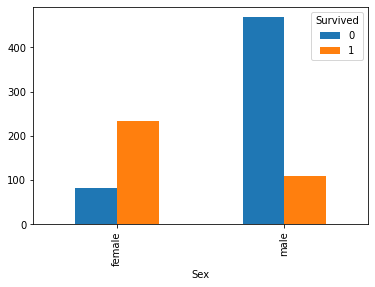

In [143]:
# grouped_sex with unstack, we plot the table as a bar:

grouped_sex.unstack(level=0).plot.bar()
plt.show()

In [144]:
# How is the relation between others variables?

train.groupby(['Pclass', 'Embarked']).count()['PassengerId']

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: PassengerId, dtype: int64

In [145]:
train.groupby(['Pclass', 'Embarked']).count()['PassengerId'].unstack(level=0)

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


<AxesSubplot:xlabel='Embarked'>

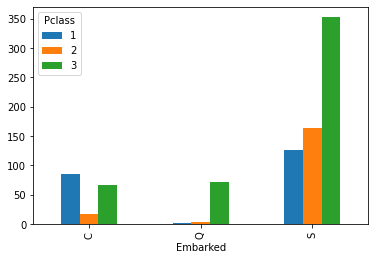

In [146]:
train.groupby(['Pclass', 'Embarked']).count()['PassengerId'].unstack(level=0).plot.bar()

We can say that most of the 3rd class used the pord S but there it doesn't have significant value (for me)

### 3. Processing the data

We choose the variables we work with:

- Survived
- Sex
- Age
- Pclass

In this case we want to know the Survived variable and the relation around the next variables.

In [147]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [148]:
# Are there null data?

train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


- Age has missing values

- Sex is object type, but we need it as a int or float for algorithms

In [149]:
# People who didn't register Age:

train['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [150]:
train[train['Age'].isna()].groupby(['Sex', 'Pclass'])

In [151]:
train[train['Age'].isna()].groupby(['Sex', 'Pclass']).count()['PassengerId']

Sex     Pclass
female  1          9
        2          2
        3         42
male    1         21
        2          9
        3         94
Name: PassengerId, dtype: int64

In [152]:
train[train['Age'].isna()].groupby(['Sex', 'Pclass']).count()['PassengerId'].unstack(level=0)

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


We can see that Null values are distributed mostly in the 3rd class and males

In [153]:
# Relative of poeple who travel alone
# sibsp = # of siblings / spouses aboard the Titanic
# parch = # of parents / children aboard the Titanic

train[train['Age'].isna()].groupby(['SibSp', 'Parch']).count()['PassengerId'].unstack(level=0)

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


From above we can conclude that `133` were people who travelled alone and mostly 3rd class

We had null values for Age, so we're gonna inputs median Age in the missing values

In [154]:
# Calculate madian of Age

train['Age'].median()

28.0

In [155]:
# Input values to fill null values in Age

train['Age'] = train['Age'].fillna(28.0)

In [156]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


There is no Null values in Age anymore

Now let's change the type of Sex

In [157]:
# We use .map in the variable 'sex' where we change the variables from object (female) to int (1)

train['Sex'] = train['Sex'].map({'female':1, 'male':0}).astype(int)

In [158]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


### 3.1 Creating new variables for poeple who travel alone

In [159]:
# Flag variables are when it is 0 or 1, same as True of False = This means 0 (doesn't travel alone) and 1 (Yes, they travel alone)
# In this case, SibSp must be 0, since these are people who traveled alone OR! Parch == 0 (no relative or family)

train['FlagSolo'] = np.where((train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

In [160]:
train['FlagSolo']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: FlagSolo, Length: 891, dtype: int64

In [161]:
grouped_flag = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
grouped_flag

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64

In [162]:
grouped_flag.unstack(level=0)

Survived,0,1
FlagSolo,,
0,175,179
1,374,163


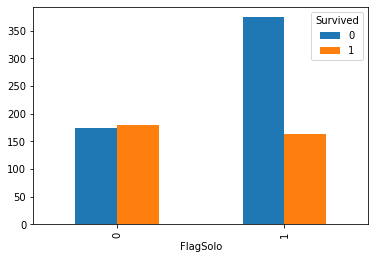

In [163]:
grouped_flag.unstack(level=0).plot.bar()
plt.show()

For people who travel with someone, they had equal survivor rates... in the other hand, poeple who travel alone, had less possibilities to survive

In [164]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


We can set up the vairables for the model

In [165]:
# Dependence Variable
Y_train = train['Survived']

#Processing independent Variables
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

In [166]:
print(Y_train.shape)
print(X_train.shape)

(891,)
(891, 4)


### 4. Model

We work with two test model:
- Logistic Regretion
- Decision tree

In [167]:
# Training Logistic regretion model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [168]:
# Training the Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

### 5. Testing

We will make a Confusion Matrix and test how accured is each model

In [169]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, X_train, Y_train, cmap=plt.cm.Blues, values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

accuracy:  0.79


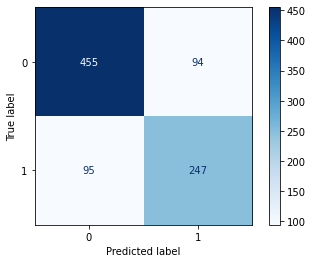

In [170]:
conf_mat_acc(logreg)

The Accuracy is as follow (455+247)/(455+247+94+95)=0.79

455: in the database the value was 0 but the prediction was 0, so it is correct!

247: in the database the value was 1 but the prediction was 1, so it is correct! 

94: in the database the value was 0 but the prediction was 1, so it is incorrect

94: in the database the value was 1 but the prediction was 0, so it is incorrect

*The best model would be 0 in the errors (94 & 95) and whole the values in the diagonal*

#### Let's evalue the next model

accuracy:  0.89


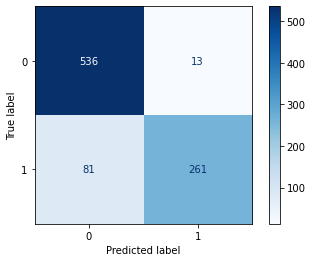

In [171]:
conf_mat_acc(decision_tree)

It seems to be the decision tree may be better. But this predictions is made base on the train data and this could let us the wrong values since we use the same data from train in the evaluation. This is like using the answer in the questions.

In this way we follow the assessment of the Test Set

### 5.1 Test Set Assessment

We use the train data to train a model and the test data to verify (the test data is data that the model hasn't seen and has to be work on)

We have the test data without survivor columns. This means that we use the train data to get the new column in the test data and make the predition!!

In [172]:
# Getting the test set ready

test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Since we have the same problem as before: null values in Age and Sex as object, we process in the same way

In [174]:
# Processing data

# Mapping and changing Sex type
test['Sex'] = test['Sex'].map({'female':1, 'male':0}).astype(int)

# Fill Age
test['Age'] = test['Age'].fillna(28.0)

# Creating FlagSolo
test['FlagSolo'] = np.where((test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)



In [175]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [176]:
# Taking a look in the interested data:

test[features].head(3)

,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [178]:
# Creating test set
X_test = test[features]

X_test.shape

(418, 4)

In [180]:
# Predition of survivor in test data

Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


This prediction above should be compared with the real value to have a better estimation of the error and be able to choose the right model. However, since these real values is on Kaggle and we don't have access to it.

### 6. Prediction

In [181]:
# Prediction

print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [182]:
# Download

def download_output(y_pred, name):
    output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
    output.to_csv(name, index=False)

In [183]:
download_output(Y_pred_log, 'Titinic_pred_log.csv')
download_output(Y_pred_log, 'Titinic_pred_tree.csv')

## Conclusion

1. It is important the Exploratory Analysis to see the relation between variables

2. Create variables of people who were completely alone

3. Test 2 models: Matrix and Decision Tree

4. Calculated the error with the test data